In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
import os
import json

# Combine unigrams

* 초기 코로나

In [ ]:
directory = '/content/drive/MyDrive/covid analysis/gram_stem_1'
result = pd.DataFrame(columns=['term','counts'])

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("-1gram.csv"): 
         data = pd.read_csv(directory + '/' +filename, header=None,names=['term','counts'])
         result = pd.concat([result, data])
     else:
         continue

print("Data has been merged")

result = result.astype({'counts': 'int32'})
result = result.astype({'term': 'str'})

agg = result.groupby('term', as_index=False)[['counts']].sum()
agg = agg.sort_values(by='counts', ascending=False)
agg.to_csv("Early_term_counts.csv",index=False)

Data has been merged


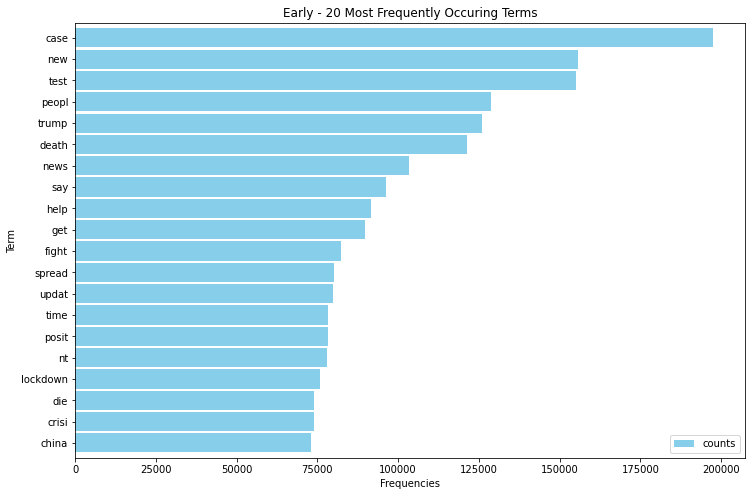

In [ ]:
gram_series = agg[:20]
gram_series.set_index('term', inplace = True)
gram_series.plot.barh(color='skyblue', width = .9, figsize = (12, 8)).invert_yaxis()
plt.title('Early - 20 Most Frequently Occuring Terms')
plt.ylabel('Term')
plt.xlabel("Frequencies")
plt.show()

* 후기 코로나

In [ ]:
directory = '/content/drive/MyDrive/covid analysis/gram_stem_2'
result = pd.DataFrame(columns=['term','counts'])

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("-1gram.csv"): 
         data = pd.read_csv(directory + '/' +filename, header=None,names=['term','counts'])
         result = pd.concat([result, data])
     else:
         continue

print("Data has been merged")

result = result.astype({'counts': 'int32'})
result = result.astype({'term': 'str'})

agg = result.groupby('term', as_index=False)[['counts']].sum()
agg = agg.sort_values(by='counts', ascending=False)
agg.to_csv("Late_term_counts.csv",index=False)

Data has been merged


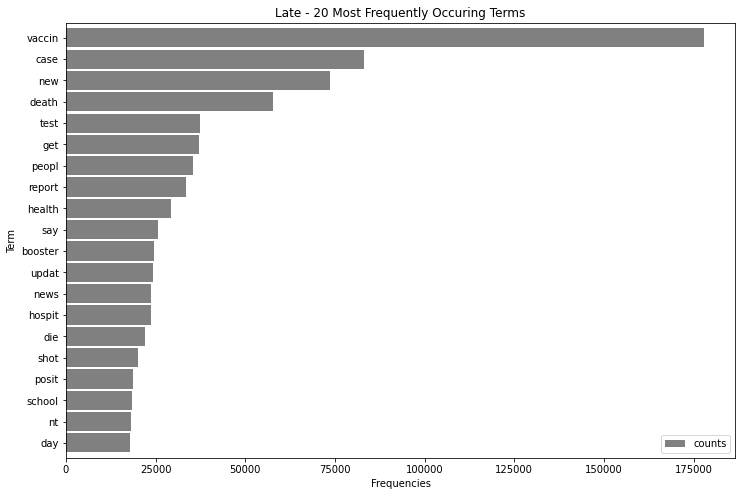

In [ ]:
gram_series = agg[:20]
gram_series.set_index('term', inplace = True)
gram_series.plot.barh(color='gray', width = .9, figsize = (12, 8)).invert_yaxis()
plt.title('Late - 20 Most Frequently Occuring Terms')
plt.ylabel('Term')
plt.xlabel("Frequencies")
plt.show()

# Combine N-grams

* 초기 코로나

In [ ]:
directory = '/content/drive/MyDrive/covid analysis/gram_stem_1'
result = pd.DataFrame(columns=['gram','counts'])

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("-ngram.csv"): 
         data = pd.read_csv(directory + '/' + filename, header=None,names=['gram','counts'])
         result = pd.concat([result, data])
     else:
         continue

print("Data has been merged")

result = result.astype({'counts': 'int32'})
result = result.astype({'gram': 'str'})

agg = result.groupby('gram', as_index=False)[['counts']].sum()
agg = agg.sort_values(by='counts', ascending=False)
agg.to_csv("Early_n_gram_counts.csv",index=False)

Data has been merged


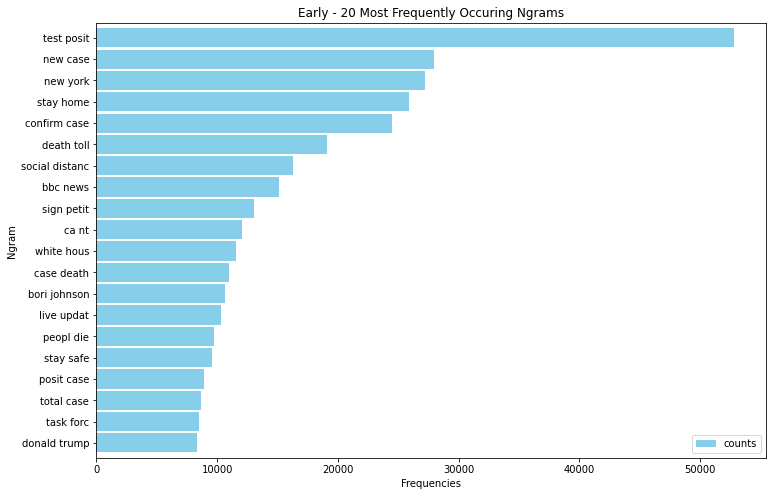

In [ ]:
ngram_series = agg[:20]
ngram_series.set_index('gram', inplace = True)
ngram_series.plot.barh(color='skyblue', width = .9, figsize = (12, 8)).invert_yaxis()
plt.title('Early - 20 Most Frequently Occuring Ngrams')
plt.ylabel('Ngram')
plt.xlabel("Frequencies")
plt.show()

* 후기 코로나

In [ ]:
directory = '/content/drive/MyDrive/covid analysis/gram_stem_2'
result = pd.DataFrame(columns=['gram','counts'])

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("-ngram.csv"): 
         data = pd.read_csv(directory + '/' + filename, header=None,names=['gram','counts'])
         result = pd.concat([result, data])
     else:
         continue

print("Data has been merged")

result = result.astype({'counts': 'int32'})
result = result.astype({'gram': 'str'})

agg = result.groupby('gram', as_index=False)[['counts']].sum()
agg = agg.sort_values(by='counts', ascending=False)
agg.to_csv("Late_n_gram_counts.csv",index=False)

Data has been merged


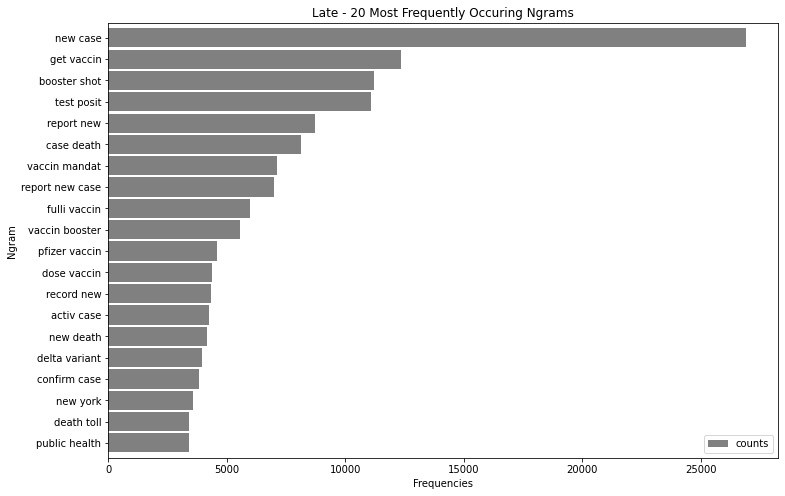

In [ ]:
ngram_series = agg[:20]
ngram_series.set_index('gram', inplace = True)
ngram_series.plot.barh(color='gray', width = .9, figsize = (12, 8)).invert_yaxis()
plt.title('Late - 20 Most Frequently Occuring Ngrams')
plt.ylabel('Ngram')
plt.xlabel("Frequencies")
plt.show()

# Save bigram and trigram

In [ ]:
count = agg['gram'].str.split().str.len()

trigrams = agg[~(count==2)]
bigrams = agg[~(count==3)]

bigrams.to_csv("bigram_counts_clean.csv",index=False)
trigrams.to_csv("trigram_counts_clean.csv",index=False)

# Show graph with n grams

# Word Cloud

In [ ]:
from IPython.display import clear_output

!pip install wordcloud
!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/parse_json_lite.py -O parse_json_lite.py
!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py -O fields.py

clear_output()

In [ ]:
import fields 

fieldsFilter = fields.fields
directory = '/content/drive/MyDrive/covid analysis/preprocessed_stem_2'
result = pd.DataFrame(columns=['created_at', 'text'])

for file in os.listdir(directory):
  filename = os.fsdecode(file)
  print(filename)
  data = []
  with open(directory +'/' + filename, 'r') as f:
    for line in f:
      data.append(json.loads(line))
  df = pd.json_normalize(data)
  df = df.loc[:, df.columns.isin(fieldsFilter)]
  result = pd.concat([result, df])

preprocssed_1002.json
preprocssed_1001.json
preprocssed_0930.json
preprocssed_0929.json
preprocssed_0927.json
preprocssed_0926.json
preprocssed_0925.json
preprocssed_0924.json
preprocssed_0923.json
preprocssed_0922.json
preprocssed_1005.json
preprocssed_1004.json
preprocssed_1003.json
preprocssed_0928.json


In [ ]:
print(len(result))
print(result.head())

689915
                       created_at                                               text
0  Sat Oct 02 04:04:11 +0000 2021       [shop, worker, like, catch, last, two, wave]
1  Sat Oct 02 04:02:48 +0000 2021  [surpris, nt, trend, yet, suprem, court, justi...
2  Sat Oct 02 04:02:29 +0000 2021  [get, closer, beat, togeth, aseana, citi, esta...
3  Sat Oct 02 04:04:03 +0000 2021  [everyth, decid, u, saskatoon, long, term, car...
4  Sat Oct 02 04:03:54 +0000 2021  [death, russia, hit, record, friday, fourth, s...


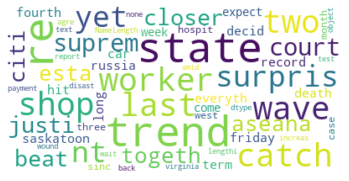

FileNotFoundError: ignored

In [ ]:
text = str(result['text'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure() 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # x,y축 숫자 제거
plt.show()

# Save the image in the img folder
wordcloud.to_file("img/first_review.png")